
#Import module yang diperlukan

In [ ]:
import pandas as pd
import pydotplus
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from sklearn import tree
from IPython.display import Image
import graphviz

#Menyiapkan data yang mau diolah

In [ ]:
col_names = ['Warna', 'Bulu', 'Makanan Kesukaan', 'Jenis']
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/data1.csv", header = None, names = col_names)
data

,Warna,Bulu,Makanan Kesukaan,Jenis
0,Hitam,Panjang,Wortel,A
1,Putih,Panjang,Wortel,A
2,Cokelat,Pendek,Kangkung,B
3,Hitam,Pendek,Kangkung,B
4,Hitam,Gimbal,Rumput,C
5,Cokelat,Gimbal,Rumput,A
6,Cokelat,Panjang,Rumput,B
7,Putih,Pendek,Wortel,B
8,Putih,Pendek,Kangkung,C
9,Cokelat,Gimbal,Kangkung,C


#Mengubah data objek menjadi float agar bisa diolah

In [ ]:
#memisalkan warna dengan angka
data.replace("Hitam", 0, inplace = True) #memisalkan hitam menjadi 0
data.replace("Putih", 1, inplace = True) #memisalkan putih menjadi 1
data.replace("Cokelat", 2, inplace = True) #memisalkan cokelat menjadi 2

#memisalkan bulu dengan angka
data.replace("Panjang", 0, inplace = True) #memisalkan panjang menjadi 0
data.replace("Pendek", 1, inplace = True) #memisalkan pendek menjadi 1
data.replace("Gimbal", 2, inplace = True) #memisalkan gimbal menjadi 2

#memisalkan makanan kesukaan dengan angka
data.replace("Wortel", 0, inplace = True) #memisalkan hitam menjadi 0
data.replace("Kangkung", 1, inplace = True) #memisalkan putih menjadi 1
data.replace("Rumput", 2, inplace = True) #memisalkan cokelat menjadi 2

data.head()

,Warna,Bulu,Makanan Kesukaan,Jenis
0,0,0,0,A
1,1,0,0,A
2,2,1,1,B
3,0,1,1,B
4,0,2,2,C


#Tetapkan feature dan variabel target

In [ ]:
feature_cols = ['Warna', 'Bulu', 'Makanan Kesukaan']

#Features
X = data[feature_cols] 

#Target variable
y = data.Jenis 

print(X)
print(y)

   Warna  Bulu  Makanan Kesukaan
0      0     0                 0
1      1     0                 0
2      2     1                 1
3      0     1                 1
4      0     2                 2
5      2     2                 2
6      2     0                 2
7      1     1                 0
8      1     1                 1
9      2     2                 1
0    A
1    A
2    B
3    B
4    C
5    A
6    B
7    B
8    C
9    C
Name: Jenis, dtype: object


#Test data menggunakan metode split train

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 1)

#Buat model sekaligus wadah dari hasil pengetesan data split train

In [ ]:
clf = DecisionTreeClassifier(random_state = 1)
clf = clf.fit(X_train , y_train)

#Fungsi Prediksi

In [ ]:
y_pred = clf.predict(X_test)

#Menampilkan tingkat akurasi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[0 0 0]
 [0 1 0]
 [1 0 0]]
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         0
           B       1.00      1.00      1.00         1
           C       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2

Accuracy: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

#Memvisualisasikan Model Tree Decission

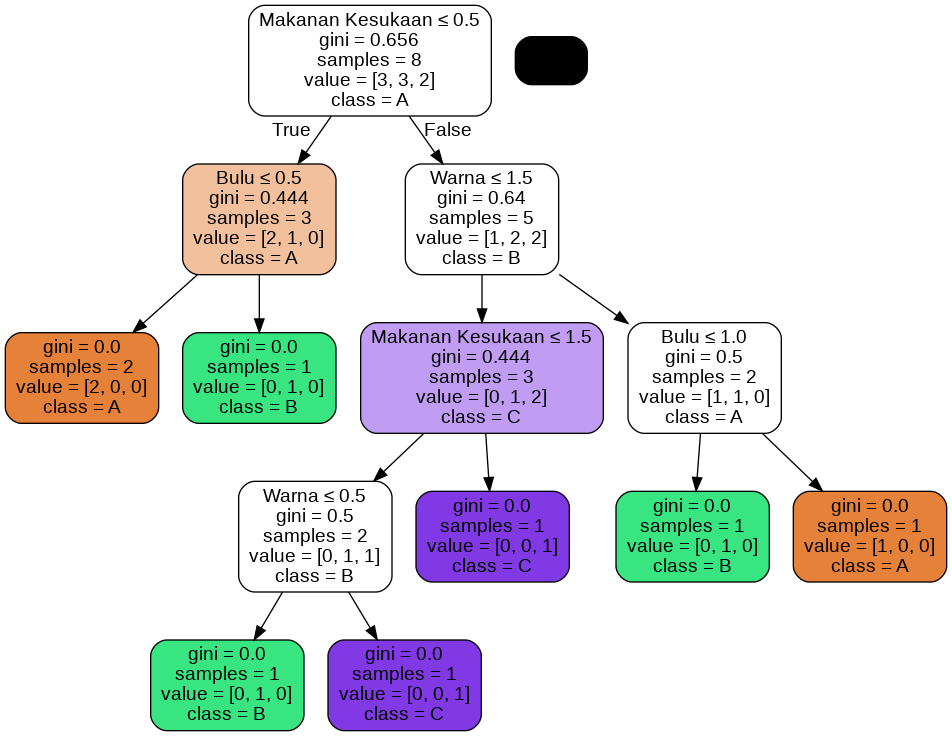

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names = feature_cols,class_names=['A','B', 'C'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('jenis-tree-decission.png')
Image(graph.create_png())


In [ ]:
col_names_test = ['Warna', 'Bulu', 'Makanan Kesukaan', 'Jenis']
data_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/data2.csv", header = None, names = col_names)
data_test

,Warna,Bulu,Makanan Kesukaan,Jenis
0,Hitam,Gimbal,Rumput,?
1,Putih,Pendek,Wortel,?
2,Cokelat,Panjang,Kangkung,?
3,Putih,Panjang,Rumput,?
4,Cokelat,Gimbal,Kangkung,?


In [ ]:
data_test.replace("?", np.nan, inplace = True)
data_test.head()

,Warna,Bulu,Makanan Kesukaan,Jenis
0,Hitam,Gimbal,Rumput,NaN
1,Putih,Pendek,Wortel,NaN
2,Cokelat,Panjang,Kangkung,NaN
3,Putih,Panjang,Rumput,NaN
4,Cokelat,Gimbal,Kangkung,NaN


In [ ]:
#memisalkan warna dengan angka
data_test.replace("Hitam", 0, inplace = True) #memisalkan hitam menjadi 0
data_test.replace("Putih", 1, inplace = True) #memisalkan putih menjadi 1
data_test.replace("Cokelat", 2, inplace = True) #memisalkan cokelat menjadi 2

#memisalkan bulu dengan angka
data_test.replace("Panjang", 0, inplace = True) #memisalkan panjang menjadi 0
data_test.replace("Pendek", 1, inplace = True) #memisalkan pendek menjadi 1
data_test.replace("Gimbal", 2, inplace = True) #memisalkan gimbal menjadi 2

#memisalkan makanan kesukaan dengan angka
data_test.replace("Wortel", 0, inplace = True) #memisalkan hitam menjadi 0
data_test.replace("Kangkung", 1, inplace = True) #memisalkan putih menjadi 1
data_test.replace("Rumput", 2, inplace = True) #memisalkan cokelat menjadi 2

data_test.head()

,Warna,Bulu,Makanan Kesukaan,Jenis
0,0,2,2,NaN
1,1,1,0,NaN
2,2,0,1,NaN
3,1,0,2,NaN
4,2,2,1,NaN
